# **Improving Employee Retention By Predicting Employee Attrition Using Machine Learning**

### **Import Libraries and Settings**

In [67]:
# Import initial necessary libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Settings of dataframe display
pd.options.display.max_columns = 100
pd.options.display.max_colwidth = None

# Version requirements
print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.26.4
pandas version :  2.2.1
seaborn version :  0.13.2


## Load Dataset

In [68]:
df = pd.read_csv('Dataset CSV Version.csv')

In [69]:
df.sample(5)

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
57,insecureShads2,111302,Belum_menikah,Wanita,Outsource,Product Design (UI & UX),Freshgraduate_program,Sangat_bagus,Jakarta Utara,LinkedIn,2,2.0,0.0,6.0,3.0,+6289741767xxx,insecureShads2204@proton.com,Sarjana,1,NaN,masih_bekerja,1980-09-30,2014-3-31,2019-03-09,-
141,brainyBittern0,106446,Lainnya,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Indeed,3,5.0,0.0,0.0,13.0,+6281271727xxx,brainyBittern0336@icloud.com,Doktor,1,NaN,masih_bekerja,1972-07-03,2011-07-05,2013-01-06,-
251,importedJerky1,106093,Bercerai,Wanita,Outsource,Software Engineer (Front End),Freshgraduate_program,Sangat_bagus,Jakarta Utara,CareerBuilder,4,3.0,0.0,0.0,17.0,+6285715469xxx,importedJerky1918@yahoo.com,Sarjana,1,NaN,NaN,1979-01-17,2011-9-26,2018-07-02,-
121,crushedLollies6,105488,Menikah,Pria,FullTime,Software Engineer (Back End),Freshgraduate_program,Biasa,Jakarta Pusat,Indeed,3,5.0,7.0,0.0,8.0,+6289900398xxx,crushedLollies6670@outlook.com,Magister,1,NaN,kejelasan_karir,1972-02-09,2016-09-06,2020-1-15,2016-10-31
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3.0,0.0,0.0,11.0,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,1,1.0,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24


In [70]:
# Checking shape of dataframe
print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns {df.shape[1]}')

Number of rows: 287
Number of columns 25


The original dataframe has 287 rows and 25 columns.

In [71]:
# Dataset overview
desc_col = []

for col in df.columns :
    desc_col.append([col, df[col].dtype, df[col].isna().sum(), round(df[col].isna().sum()/len(df) * 100, 2), df.duplicated().sum(), df[col].nunique(), df[col].unique()[:5]])

desc_df = pd.DataFrame(data=desc_col, columns='Feature, Data Type, Null Values, Null Percentage (%), Duplicated Values, Unique Values, 5 Unique Sample'.split(","))
desc_df

,Feature,Data Type,Null Values,Null Percentage (%),Duplicated Values,Unique Values,5 Unique Sample
0,Username,object,0,0.00,0,285,"[spiritedPorpoise3, jealousGelding2, pluckyMuesli3, stressedTruffle1, shyTermite7]"
1,EnterpriseID,int64,0,0.00,0,287,"[111065, 106080, 106452, 106325, 111171]"
2,StatusPernikahan,object,0,0.00,0,5,"[Belum_menikah, Menikah, Bercerai, Lainnya, -]"
3,JenisKelamin,object,0,0.00,0,2,"[Pria, Wanita]"
4,StatusKepegawaian,object,0,0.00,0,3,"[Outsource, FullTime, Internship]"
5,Pekerjaan,object,0,0.00,0,14,"[Software Engineer (Back End), Data Analyst, Software Engineer (Front End), Product Manager, Software Engineer (Android)]"
6,JenjangKarir,object,0,0.00,0,3,"[Freshgraduate_program, Senior_level, Mid_level]"
7,PerformancePegawai,object,0,0.00,0,5,"[Sangat_bagus, Sangat_kurang, Bagus, Biasa, Kurang]"
8,AsalDaerah,object,0,0.00,0,5,"[Jakarta Timur, Jakarta Utara, Jakarta Pusat, Jakarta Selatan, Jakarta Barat]"
9,HiringPlatform,object,0,0.00,0,9,"[Employee_Referral, Website, Indeed, LinkedIn, CareerBuilder]"


## **About The Dataset**

**Overview:**
- Dataset contains 287 rows, 25 features.

- Dataset consists of 3 data types; float64, int64 and object.

- `TanggalLahir`, `TanggalHiring`, `TanggalPenilaianKaryawan`, `TanggalResign` feature will be changed from object into datetime data type.

- Dataset contains null values in various columns, will be handled after checking the distribution for proper imputation method. As for `IkutProgramLOP` will directly drop since it has high missing percentage. Also some columns that have "-" values will need to be considered as null values and filtered later. We only have 287 rows of data which is very small so dropping rows might not be the best approach for our model training.

- Some columns like `SkorSurveyEngagement`, `SkorKepuasanPegawai`, `JumlahKeikutsertaanProjek`, `JumlahKeterlambatanSebulanTerakhir`, `JumlahKetidakhadiran`, `IkutProgramLOP` have float data type when it doesn't actually need or representative in decimal value, these feature data type will be changed to integer.

- `PernahBekerja` column have invalid value, it normally should be binary but instead it has 1 and yes. This column will be dropped or the values will need to be re-checked.

- Originally there is no column to determine whether an employee resigned or not, this will be extracted from `TanggalResign` column later.

- (Optional) Changing the name of some columns or the values to standardize the overall writing format might be necessary. For values it probably more prioritized because the format varies so much compared to column names, as for the format of the values will follow `Pekerjaan` column format (ex: Product Manager, Data Analyst, etc)

**Feature Descriptions**

- `Username`: Username of the employee account
- `EnterpriseID`: ID of the employee in the company
- `StatusPernikahan`: Marital status of the employee
- `JenisKelamin`: Gender of the employee
- `StatusKepegawaian`: Employment status of the employee
- `Pekerjaan`: Role of the employee
- `JenjangKarir`: Level of experience of the employee
- `PerformancePegawai`: Employee performance category score
- `AsalDaerah`: Employee region of origin
- `HiringPlatform`: Platform the employee application is accepted

- `SkorSurveyEngagement`: Level of employee engagement within the organization
- `SkorKepuasanPegawai`: Level of how satisfied employees are with their job and the workplace
- `JumlahKeikutsertaanProjek`: Number of times the employee join a project
- `JumlahKeterlambatanSebulanTerakhir`: Number of times the employee is late
- `JumlahKetidakhadiran`: Number of times the employee is absent
- `NomorHP`: Handphone number of the employee
- `Email`: Personal email of the employee
- `TingkatPendidikan`: Education level Handphone number of the employee
- `PernahBekerja`: Whether the employee have previous work experience or not
- `IkutProgramLOP`: Whether the employee join LOP Program or not

- `AlasanResign`: Reason for resignation of the employee
- `TanggalLahir`: Birth date of the employee
- `TanggalHiring`: Hiring date of the employee
- `TanggalPenilaianKaryawan`: Scoring date of the employee
- `TanggalResign`: Resignation date of the employee

## Initial Transformation

In [72]:
df['PernahBekerja'].value_counts()

PernahBekerja
1      286
yes      1
Name: count, dtype: int64

Even if the 'yes' value in `PernahBekerja` column originally should be 0, this column doesn't mean anything. So this column will be drop.

In [73]:
# Drop columns that have invalid and large missing percentage
df.drop(columns=['PernahBekerja', 'IkutProgramLOP'], inplace=True)

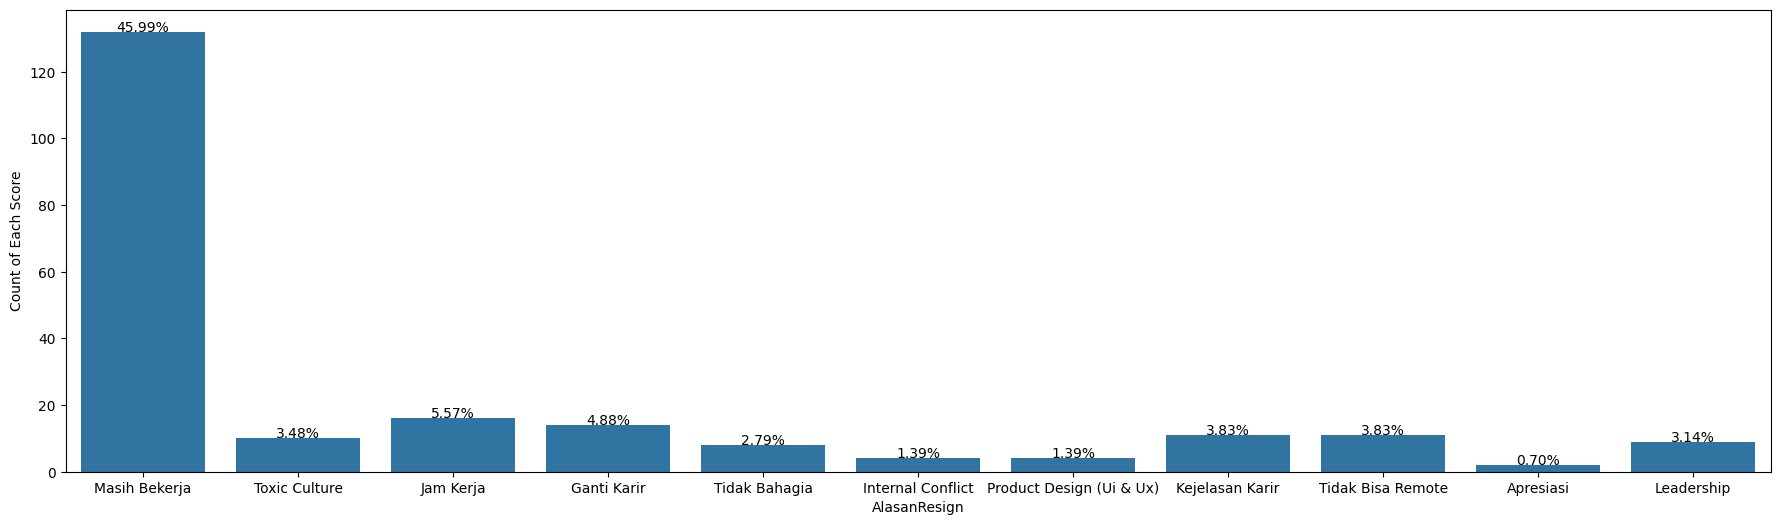

In [185]:
# Check categorical distribution for AlasanResign column for proper imputation method
plt.figure(figsize=(22, 6))
ax = sns.countplot(data=df, x='AlasanResign')

# Calculate the percentage for each category
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.1,
            '{:.2f}%'.format((height / total
                              ) * 100),
            ha="center")
plt.ylabel('Count of Each Score')
plt.show()

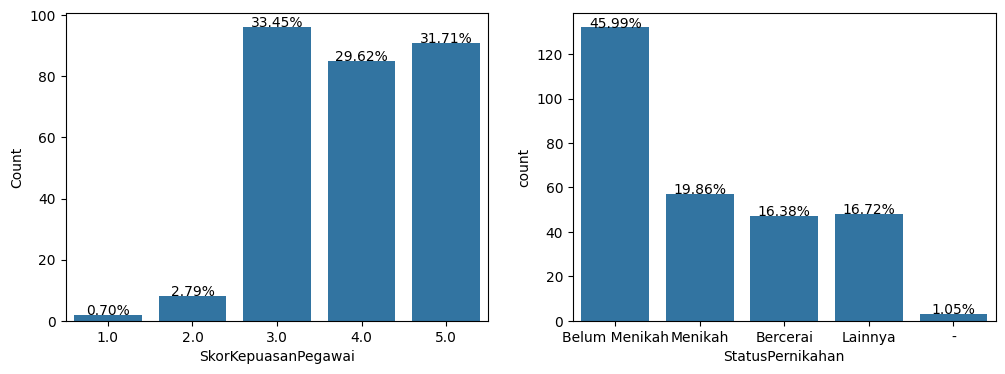

In [198]:
# Check categorical distribution for SkorKepuasanPegawai and StatusPernikahan column for proper imputation method
impute_cat_cols = ['SkorKepuasanPegawai', 'StatusPernikahan']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
for i, col in enumerate(impute_cat_cols):
    sns.countplot(data=df, x=col, ax=ax[i])

    # Calculate the percentage for each category and annotate bars
    total = float(len(df))
    for p in ax[i].patches:
        height = p.get_height()
        ax[i].text(p.get_x() + p.get_width() / 2.,
                    height + 0.1,
                    '{:.2f}%'.format((height / total) * 100),
                    ha="center")

ax[0].set_ylabel('Count')
plt.show()

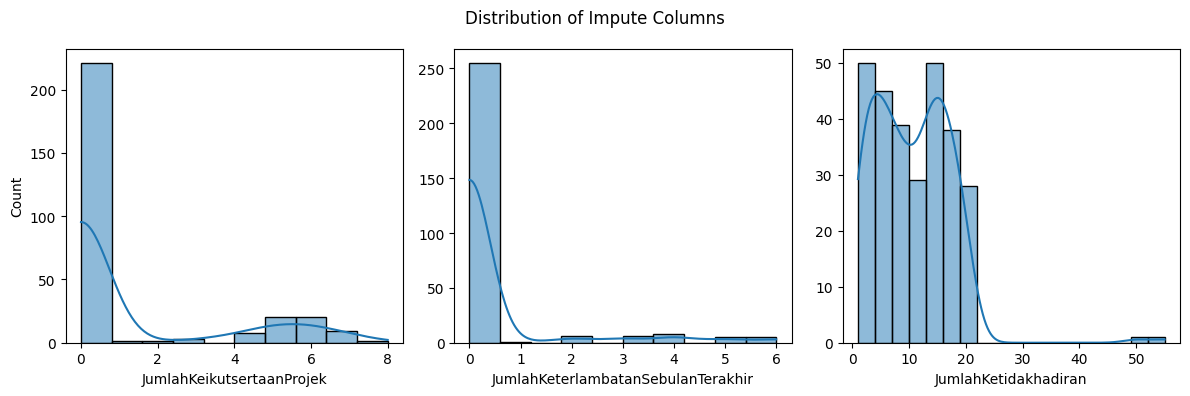

In [200]:
# Checking distribution in numerical columns with missing value for proper imputation method
impute_num_cols = ['JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran']

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Plot histograms for each column
for i, col in enumerate(impute_num_cols):
    sns.histplot(data=df, x=col, kde=True, ax=ax[i])
    if i != 0:
        ax[i].set_ylabel(None)

plt.suptitle('Distribution of Impute Columns')
plt.tight_layout()
plt.show()

> Imputation method based on distribution :

- `AlasanResign` : mode
- `SkorKepuasanPegawai` : median
- `StatusPernikahan` : mode
- `JumlahKeikutsertaanProjek` : mode (will most definitely the same as it's median)
- `JumlahKeterlambatanSebulanTerakhir` : mode (will most definitely the same as it's median)
- `JumlahKetidakhadiran` : median

In [219]:
# Impute missing values and replace invalid values
df['JumlahKeikutsertaanProjek'] = df['JumlahKeikutsertaanProjek'].fillna(df['JumlahKeikutsertaanProjek'].mode()[0])
df['JumlahKeterlambatanSebulanTerakhir'] = df['JumlahKeterlambatanSebulanTerakhir'].fillna(df['JumlahKeterlambatanSebulanTerakhir'].mode()[0])
df['JumlahKetidakhadiran'] = df['JumlahKetidakhadiran'].fillna(df['JumlahKetidakhadiran'].median())
df['AlasanResign'] = df['AlasanResign'].fillna(df['AlasanResign'].mode()[0])
df['SkorKepuasanPegawai'] = df['SkorKepuasanPegawai'].fillna(df['SkorKepuasanPegawai'].median())

df['StatusPernikahan'] = df['StatusPernikahan'].replace({'-' : df['StatusPernikahan'].mode()[0]})
df['AlasanResign'] = df['AlasanResign'].replace({'Product Design (Ui & Ux)' : df['AlasanResign'].mode()[0]})

In [84]:
# Rename value names in some columns to maintain format similarity
def column_values_correction(column_values):
    new_column_values = []
    for value in column_values:
        if isinstance(value, str):
            # Split the value by underscores and capitalize each word
            words = value.split('_')
            titled_words = [word.title() for word in words]
            
            # Join the words with spaces
            new_value = ' '.join(titled_words)
            new_column_values.append(new_value)
        else:
            # If the value is not a string (e.g., NaN), keep it unchanged
            new_column_values.append(value)
    return new_column_values

# List of columns for correction
selected_columns = ['StatusPernikahan', 'StatusKepegawaian', 'JenjangKarir', 'PerformancePegawai', 'HiringPlatform', 'AlasanResign']

# Process the specified columns
for column in selected_columns:
    df[column] = column_values_correction(df[column].values)

In [86]:
# Re-check the corrected values in format of titled (ex:Data Analyst)
for col in selected_columns :
    display(df[col].unique()[:])

array(['Belum Menikah', 'Menikah', 'Bercerai', 'Lainnya', '-'],
      dtype=object)

array(['Outsource', 'Fulltime', 'Internship'], dtype=object)

array(['Freshgraduate Program', 'Senior Level', 'Mid Level'], dtype=object)

array(['Sangat Bagus', 'Sangat Kurang', 'Bagus', 'Biasa', 'Kurang'],
      dtype=object)

array(['Employee Referral', 'Website', 'Indeed', 'Linkedin',
       'Careerbuilder', 'Diversity Job Fair', 'Google Search',
       'On-Line Web Application', 'Other'], dtype=object)

array(['Masih Bekerja', 'Toxic Culture', 'Jam Kerja', 'Ganti Karir',
       'Tidak Bahagia', 'Internal Conflict', 'Product Design (Ui & Ux)',
       'Kejelasan Karir', 'Tidak Bisa Remote', 'Apresiasi', nan,
       'Leadership'], dtype=object)

As we can see now the categorical values have the same format.

In [221]:
# Float to integer data type correction
float_to_int = ['SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran']
df[float_to_int] = df[float_to_int].astype(int)

In [ ]:
# Grouping columns based on data types
cat_cols = ['Username', 'EnterpriseID', 'StatusPernikahan', 'JenisKelamin',
            'StatusKepegawaian', 'Pekerjaan', 'JenjangKarir', 'PerformancePegawai',
            'AsalDaerah', 'HiringPlatform', 'SkorSurveyEngagement', 'SkorKepuasanPegawai', 'NomorHP',
            'Email', 'TingkatPendidikan', 'PernahBekerja', 'IkutProgramLOP', 'AlasanResign']

num_cols = ['JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran']

date_cols = ['TanggalLahir', 'TanggalHiring', 'TanggalPenilaianKaryawan', 'TanggalResign']

In [204]:
for col in impute_num_cols :
    print(df[col].value_counts())
    print()

JumlahKeikutsertaanProjek
0.0    221
6.0     20
5.0     20
7.0      9
4.0      8
3.0      3
1.0      1
2.0      1
8.0      1
Name: count, dtype: int64

JumlahKeterlambatanSebulanTerakhir
0.0    255
4.0      8
3.0      6
2.0      6
5.0      5
6.0      5
1.0      1
Name: count, dtype: int64

JumlahKetidakhadiran
4.0     20
2.0     20
15.0    19
7.0     17
16.0    17
6.0     16
14.0    16
3.0     16
19.0    15
13.0    15
17.0    14
1.0     14
20.0    13
9.0     12
11.0    12
10.0    10
8.0     10
5.0      9
12.0     7
18.0     7
50.0     1
55.0     1
Name: count, dtype: int64



The numerical are all discrete type.

- Categorical columns (16 columns): 
    - `Username` : nominal
    - `EnterpriseID` : nominal
    - `StatusPernikahan` : nominal
    - `JenisKelamin` : nominal
    - `StatusKepegawaian` : nominal
    - `Pekerjaan` : nominal
    - `JenjangKarir` : ordinal
    - `PerformancePegawai` : ordinal
    - `AsalDaerah` : nominal
    - `HiringPlatform` : nominal
    - `SkorSurveyEngagement` : ordinal
    - `SkorKepuasanPegawai` : ordinal
    - `NomorHP` : nominal
    - `Email` : nominal
    - `TingkatPendidikan` : ordinal
    - `AlasanResign` : nominal

- Numerical columns (3 columns) :

    - `JumlahKeterlambatanSebulanTerakhir` : discrete
    - `JumlahKetidakhadiran` : discrete
    - `JumlahKeikutsertaanProjek` : discrete

- Date column (4 column) :
    -  `TanggalLahir, TanggalHiring, TanggalPenilaianKaryawan, TanggalResign`

In [224]:
df['AlasanResign'].value_counts()

AlasanResign
Masih Bekerja        202
Jam Kerja             16
Ganti Karir           14
Kejelasan Karir       11
Tidak Bisa Remote     11
Toxic Culture         10
Leadership             9
Tidak Bahagia          8
Internal Conflict      4
Apresiasi              2
Name: count, dtype: int64

In [225]:
df[['AlasanResign', 'TanggalResign']].sample(10)

,AlasanResign,TanggalResign
237,Masih Bekerja,-
71,Masih Bekerja,-
54,Masih Bekerja,-
227,Masih Bekerja,-
62,Masih Bekerja,-
46,Kejelasan Karir,2017-11-15
121,Kejelasan Karir,2016-10-31
93,Jam Kerja,2015-6-24
225,Masih Bekerja,-
151,Tidak Bisa Remote,2017-06-04
